# The notebook perform the following:

## 1. Binary Classification (Tree-based Model)

- **Input**: Textual data scraped from news articles, expert reports, and other reputable international sources.
- **Output**: Binary classification of next year's GDP growth rate from the World Bank. (e.g., =1 for growth, =0 for no growth).
- **Algorithm**: Tree-based models such as decision trees and random forests.
- **Evaluation**: Use metrics like accuracy, precision, recall, and F1-score to evaluate the performance of the model.

## 2. Regression Model

- **Input**: Textual data scraped from news articles, expert reports, and other reputable international sources.(previous year GDP and current year GDP are used as input in Lasso and Ridge.)
- **Output**: Next year's Annual GDP growth rate from the World Bank.
- **Algorithm**: Regression algorithms like Tree-based Model, linear regression, ridge regression, Lasso regression, polynomial.
- **Evaluation**: Use metrics like Mean Squared Error (MSE), Root Mean Squared Error (RMSE), or Mean Absolute Error (MAE) to assess the regression model's performance.

## 3.Model Interpretation
- Parameter tuning
- Interpret the results to identify significant predictors of GDP growth and potential policy implications.

## 4. Validation and Iteration

- Validate the models using cross-validation techniques.



### Tree-based Machine Learning Models
The first part is:
- load and prepare data for machine learning model training
- train and test tree-based models (decision tree classifier/regressor, randomforest classifier/regressor)
- visualize and interpret model performance

In [1055]:
# packages for data 
import numpy as np
import pandas as pd
from collections import Counter

# packages for machine learning 
import sklearn
from sklearn import tree
from sklearn.model_selection import train_test_split
import graphviz 
# machine learning and visualization libraries
import os

from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# packages for plot and visualization
from matplotlib import pylab
import graphviz 
pylab.rcParams["figure.figsize"] = (5.0, 4.0)
%matplotlib inline

In the following tasks, we will implement several tree-based models using Python3 and scikit-learn: https://scikit-learn.org/stable/.

In [1056]:
# Check python version, one need Python3 to run the following code
from platform import python_version
print(python_version())

3.11.7


In [1057]:
# Check the version of sklearn package
sklearn.__version__

'1.2.2'

### Train and Test a Decision Tree classifier

This part load a dataset, train a decision tree classifier on the training set, and test the classifier performance on the testing set. Here are the steps: <br>
1. Import the necessary packages. <br>

**Prepare data**<br><br>
2. <u>_Load_</u> the cleaned dataset. <br>
   
3.  <u> Prepare the <u>_input feature matrix and the target variable_</u>. Then, split data into training and testing set.
<br><br>

**Model training and evaluation**<br>
4. Create a DecisionTreeClassifier object. <br>
    ---> Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html. <br>
    ---> Let's set criterion = "entropy" and random_state = 42, and keep all the other parameters with the default value.<br>
5. <u>_Fit_</u> the DecisionTreeClassifier on the training set.<br>
6. <u>_Evaluate_</u> the DecisionTreeClassifier performance using the "score" function on the testing set. 
<br><br>

**Visualization and result analysis** <br>
7. Visualize the fitted DecisionTreeClassifier and interpret its performance. <br>
    ---> More information on plotting decision trees can be found here: https://scikit-learn.org/stable/modules/tree.html
<br><br>

**Exploration**<br>
8. Finally, play with different values of model parameters. Explore how the model performance change with different parameter settings and how the visualized trees change.<br>

#### Prepare data

In [1058]:
# 2. load the dataset
df = pd.read_csv('C:/Users/Victoria/OneDrive/文档/Dropbox/Machine Learning Python/Project/data_EDA.csv') 
#generate next year GDP
df_aggregated = df.groupby('Year')['gdp'].mean().reset_index()
df_aggregated['next_year_gdp'] = df_aggregated['gdp'].shift(-1)

# Merge the lagged GDP data back to the original DataFrame
df = df.merge(df_aggregated[['Year', 'next_year_gdp']], on='Year', how='left')
df['next_year_gdp_grow_dummy'] = np.where(df['next_year_gdp'] > 0, 1, 0)


df.dropna(inplace=True)

In [1059]:
# 2. display the dataset as a pandas dataframe
df

,Year,gdp,Title,Description,gdp_normal,gdp_grow_dummy,lag_gdp,Tokenized_Description,Stem_Lemm_Description,Processed_Words,...,challeng,invest,pandem,disput,export,activ,macroeconom,access,next_year_gdp,next_year_gdp_grow_dummy
43,2021-01-01,6.228594,CDP Chair at ECOSOC Informal Briefing on the O...,Climate change is above all an equity issue,1.839823,1,-3.057810,['Climate change is above all an equity issue'],climat chang is abov all an equiti issu,"['climat', 'chang', 'is', 'abov', 'all', 'an',...",...,0,0,0,0,0,0,0,0,3.089379,1
44,2021-01-01,6.228594,World Economic Situation And Prospects: Decemb...,Favourable terms of trade provide much needed ...,1.839823,1,-3.057810,['Favourable terms of trade provide much neede...,favour term of trade provid much need polici r...,"['favour', 'term', 'of', 'trade', 'provid', 'm...",...,0,0,1,0,0,0,0,0,3.089379,1
45,2021-01-01,6.228594,"Graduation of Bangladesh, Lao People’s Democra...",UN GA adopts resolution to graduate these thre...,1.839823,1,-3.057810,['UN GA adopts resolution to graduate these th...,un ga adopt resolut to graduat these three cou...,"['un', 'ga', 'adopt', 'resolut', 'to', 'gradua...",...,0,0,0,0,0,0,0,0,3.089379,1
46,2021-01-01,6.228594,CDP member at UNIDO’s Ministerial Conference o...,Davos-style dialogue on the theme of the Confe...,1.839823,1,-3.057810,['Davos-style dialogue on the theme of the Con...,davos-styl dialogu on the theme of the confer ...,"['davos-styl', 'dialogu', 'on', 'the', 'theme'...",...,0,0,0,0,0,0,0,0,3.089379,1
47,2021-01-01,6.228594,Frontier Technology Issues: Frontier technolog...,To address the existing barriers to the adopti...,1.839823,1,-3.057810,['To address the existing barriers to the adop...,to address the exist barrier to the adopt of t...,"['to', 'address', 'the', 'exist', 'barrier', '...",...,0,1,0,0,0,0,0,0,3.089379,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6526,2019-01-01,2.590785,New Zealand: Selected Issues,This Selected Issues paper discusses interacti...,-0.147017,1,3.276283,['This Selected Issues paper discusses interac...,thi select issu paper discus interact between ...,"['thi', 'select', 'issu', 'paper', 'discus', '...",...,0,0,0,0,0,0,0,0,-3.057810,0
6527,2019-01-01,2.590785,Bangladesh: Selected Issues,This Selected Issues paper summarizes achievem...,-0.147017,1,3.276283,['This Selected Issues paper summarizes achiev...,thi select issu paper summar achiev of the aut...,"['thi', 'select', 'issu', 'paper', 'summar', '...",...,0,1,0,0,0,1,0,0,-3.057810,0
6528,2019-01-01,2.590785,Mongolia: Selected Issues,This Selected Issues paper aims to take stock ...,-0.147017,1,3.276283,['This Selected Issues paper aims to take stoc...,thi select issu paper aim to take stock of key...,"['thi', 'select', 'issu', 'paper', 'aim', 'to'...",...,1,1,0,0,0,0,0,0,-3.057810,0
6529,2020-01-01,-3.057810,Union of the Comoros: 2019 Article IV Consulta...,Economic developments over the past two years ...,-3.232077,0,2.590785,['Economic developments over the past two year...,econom develop over the past two year have bee...,"['econom', 'develop', 'over', 'the', 'past', '...",...,1,0,0,0,0,0,0,0,6.228594,1


In [1060]:
X = df.drop(columns=['Year', 'gdp', 'Title', 'Description', 'gdp_normal',  'lag_gdp','gdp_grow_dummy',
                     'Tokenized_Description', 'Stem_Lemm_Description', 'Processed_Words', 'Joined_Words','next_year_gdp','next_year_gdp_grow_dummy'])  # Features
y = df['next_year_gdp_grow_dummy']  # Target variable

In [1061]:
X.shape, y.shape

((5920, 30), (5920,))

In [1062]:
# split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape

((4144, 30), (1776, 30))

#### Model training and evaluation

In [1063]:
from sklearn.tree import DecisionTreeClassifier

In [1064]:
# Create a DecisionTreeClassifier object.  
# set criterion = "entropy" and random_state = 42, and keep all the other parameters with the default value.
dt_clf = DecisionTreeClassifier(random_state=42, criterion='entropy') 

In [1065]:
# "fit" the DecisionTreeClassifier on the training set
dt_clf = dt_clf.fit(X_train, y_train)

In [1066]:
# 6. Evaluate the DecisionTreeClassifier performance on the testing set
# Round it to the 3rd decimal 
np.round(dt_clf.score(X_test,y_test), 3)

0.863

#### Visualization and result analysis

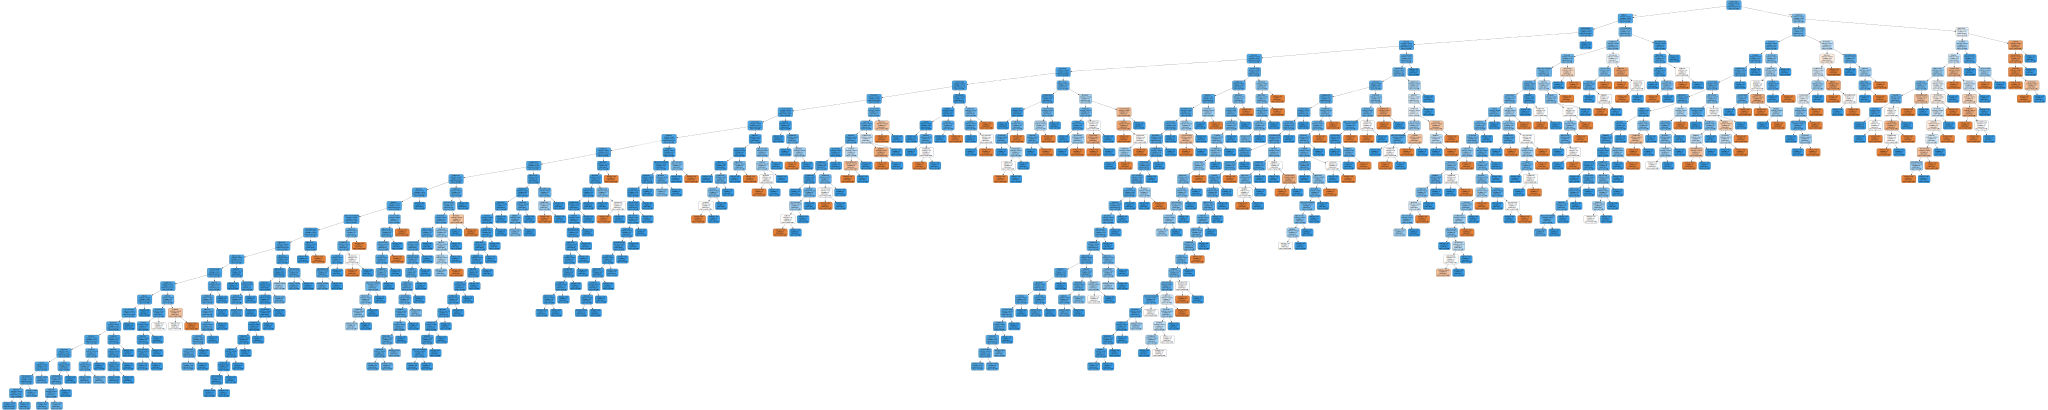

In [1067]:
# Visualize the fitted DecisionTreeClassifier
# conda install python-graphviz
dot_data = tree.export_graphviz(dt_clf, out_file=None, 
                                feature_names=X.columns, 
                                class_names=['No Growth', 'Growth'],  
                                filled=True, rounded=True,  
                                special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [1068]:
# check and interpret feature importance
pd.DataFrame([np.round(dt_clf.feature_importances_,2)], columns=X.columns)

,fiscal,remain,risk,support,continu,reform,import,need,debt,improv,...,stabil,recoveri,challeng,invest,pandem,disput,export,activ,macroeconom,access
0,0.05,0.05,0.03,0.03,0.02,0.05,0.04,0.03,0.02,0.03,...,0.05,0.03,0.03,0.03,0.02,0.02,0.02,0.04,0.02,0.03


In [1069]:
# depth of the fitted tree
dt_clf.get_depth()

30

In [1070]:
# number of leaves in the fitted tree
dt_clf.get_n_leaves()

446

In [1071]:
# predict the class labels for the given samples
dt_clf.predict(X_test[:10])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [1072]:
# predict the class probabilities for the given samples
dt_clf.predict_proba(X_test[:10])

array([[0.        , 1.        ],
       [0.08028546, 0.91971454],
       [0.08028546, 0.91971454],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.2       , 0.8       ],
       [0.        , 1.        ],
       [0.08028546, 0.91971454],
       [0.05555556, 0.94444444]])

In [1073]:
dt_clf.decision_path(X_test[:1]).toarray()

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

#### Exploration

In [1074]:
# documentation: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
dt_clf = DecisionTreeClassifier(random_state=42, criterion='gini', max_depth=5) 
dt_clf = dt_clf.fit(X_train, y_train)
np.round(dt_clf.score(X_test,y_test), 3)


0.896

In [1075]:
dt_clf = DecisionTreeClassifier(random_state=42, criterion='gini',min_samples_leaf=15, max_depth=10,min_samples_split=100) 
dt_clf = dt_clf.fit(X_train, y_train)
np.round(dt_clf.score(X_test,y_test), 3)

0.901

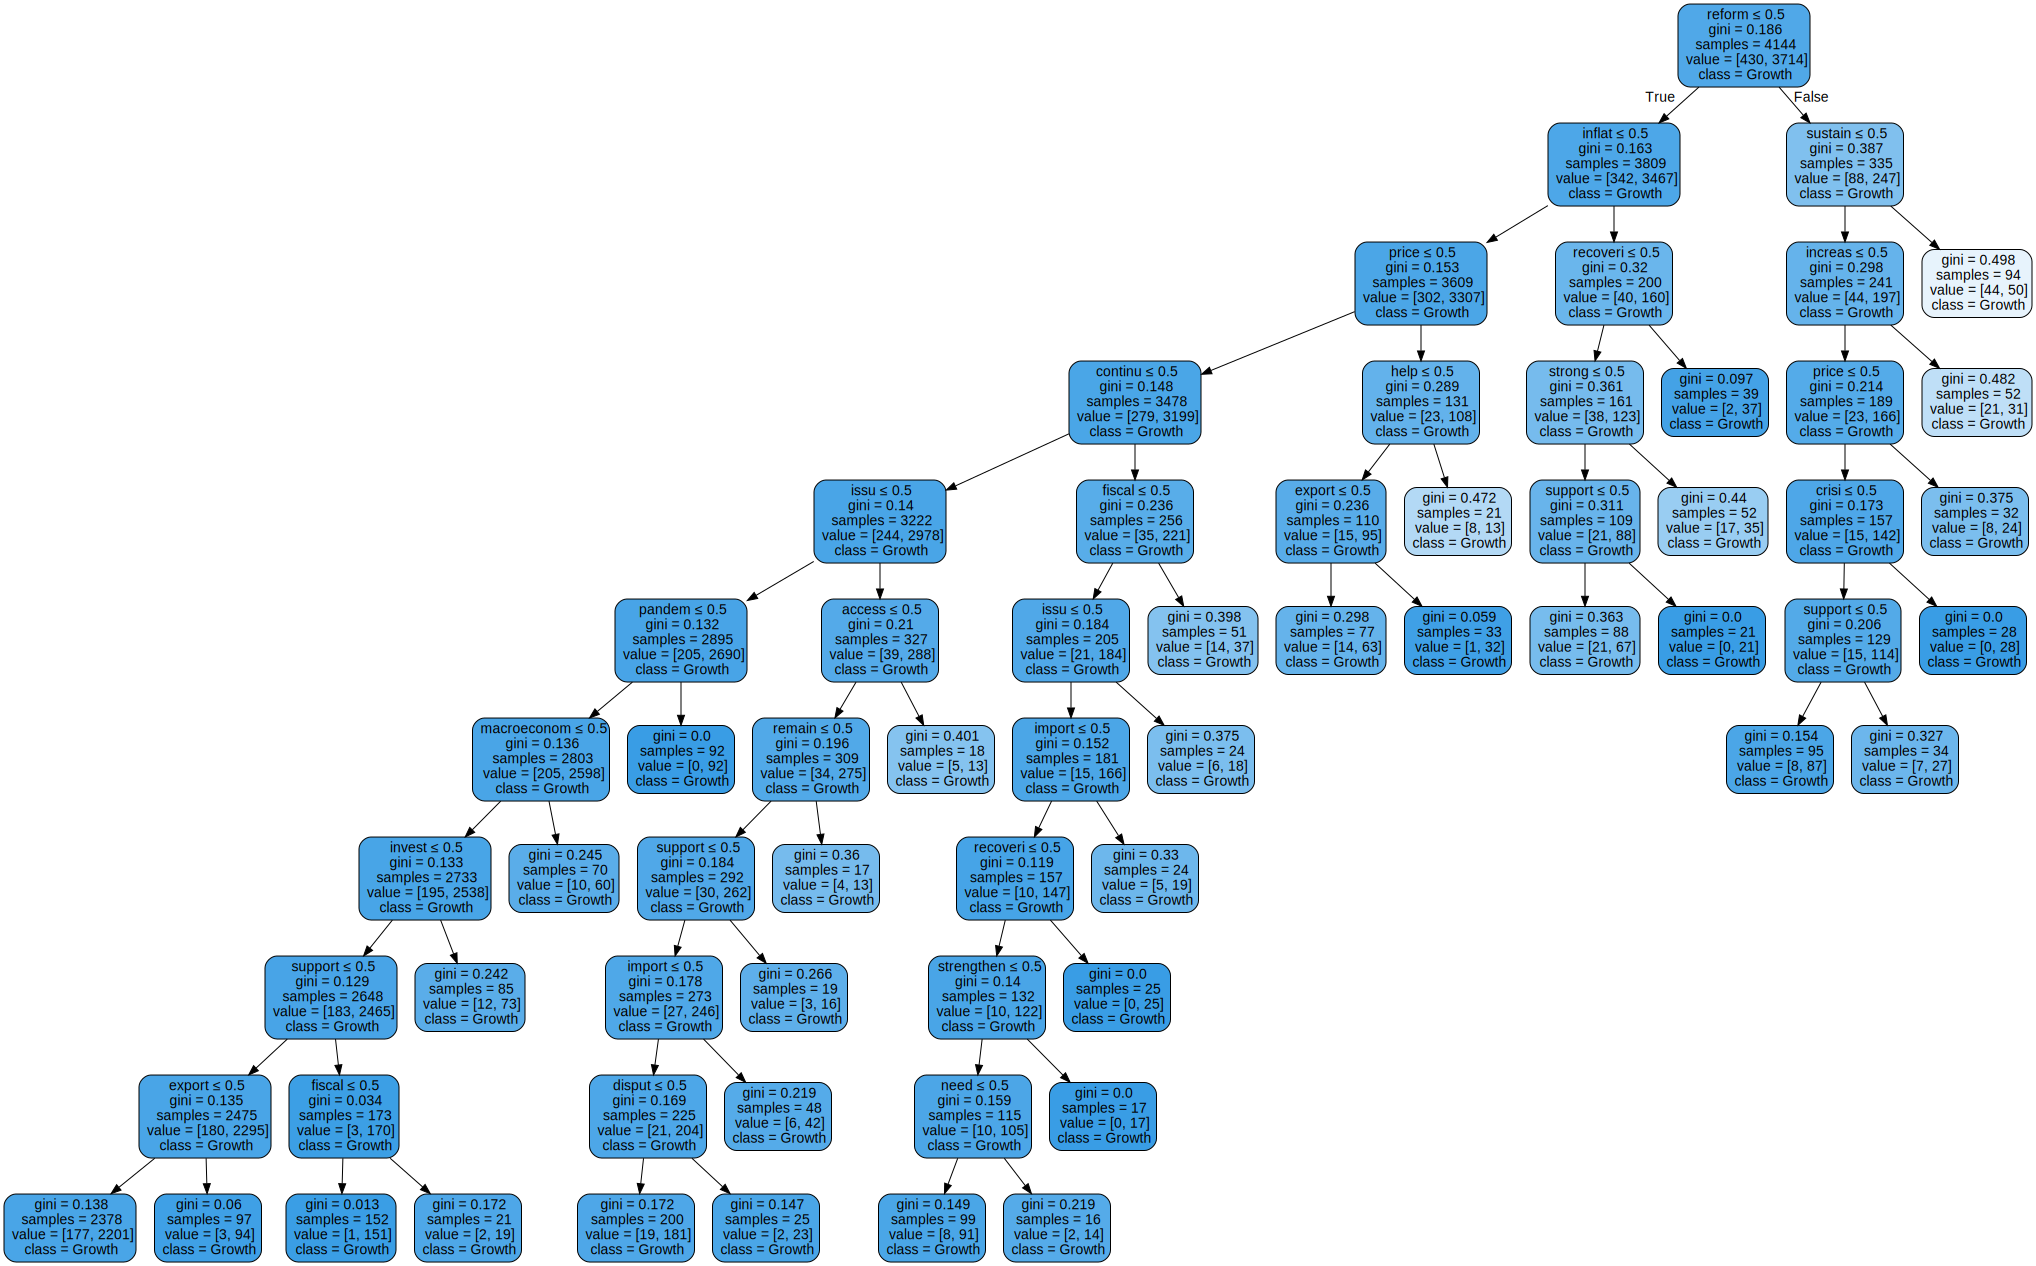

In [1076]:
dot_data = tree.export_graphviz(dt_clf, out_file=None, 
                                feature_names=X.columns, 
                                class_names=['No Growth', 'Growth'],  
                                filled=True, rounded=True,  
                                special_characters=True)   
graph = graphviz.Source(dot_data)  
graph 

In [1077]:
# list all the attributes and methods
#dir(dt_clf)

In [1078]:
importances = dt_clf.feature_importances_

# Create a DataFrame to store feature importances
feature_importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort the DataFrame by importance in descending order
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Print the ranked feature importances
print("Ranked feature importances:")
for index, row in feature_importances_df.iterrows():
    print(f"{row['Feature']}: {row['Importance']}")

Ranked feature importances:
reform: 0.2687211458768686
sustain: 0.16092742192730303
increas: 0.0947757616862509
inflat: 0.07485085130299664
support: 0.05529218698047883
price: 0.05202341736386906
fiscal: 0.03953420205337979
issu: 0.037416584374207564
recoveri: 0.034802261239687604
help: 0.030795932193899367
continu: 0.02575278656730211
export: 0.020630561267222885
strong: 0.018526497858689945
access: 0.013972183636791265
pandem: 0.01390924696460976
import: 0.013872129743028939
invest: 0.01248700958435939
macroeconom: 0.0101880521642029
crisi: 0.009080942408632562
remain: 0.00824026672950613
strengthen: 0.0032693158837176417
need: 0.0007852768544223176
disput: 0.0001459653385728063
improv: 0.0
debt: 0.0
high: 0.0
stabil: 0.0
challeng: 0.0
risk: 0.0
activ: 0.0


In [1079]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predict on the test data
y_pred = dt_clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.901463963963964
Confusion Matrix:
 [[   0  175]
 [   0 1601]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       175
           1       0.90      1.00      0.95      1601

    accuracy                           0.90      1776
   macro avg       0.45      0.50      0.47      1776
weighted avg       0.81      0.90      0.85      1776



C:\Users\Victoria\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Victoria\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Victoria\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [1080]:
import numpy as np
from sklearn.metrics import roc_auc_score
# Predict probabilities
roc_auc = roc_auc_score(y_test, y_pred)
print(f'ROC AUC Score: {roc_auc}')

ROC AUC Score: 0.5


In [1081]:
# Keep probabilities for the positive outcome only
probabilities = dt_clf.predict_proba(X_test)
y_scores = probabilities[:, 1]
roc_auc = roc_auc_score(y_test, y_scores)
print(f'ROC AUC Score: {roc_auc}')

ROC AUC Score: 0.6099848309092532


#### Discussion

The fitted decision tree classifier is: <br>
   - a tree with depth of 30 and number of leaves in the fitted tree 446.
   - At first, it achieved 0.863 accuracy on the testing set using the default.
   - The word "reform" is the most important feature in distinguishing samples of three classes, this makes sense because reform, whether economic, political, or social, can have significant impacts on next year's GDP growth rates.
   - The "sustain" is the second most important feature. Mentions of "sustain" could indicate discussions about sustaining or maintaining GDP growth, suggesting a focus on economic stability and avoiding downturns or recessions.
   - The "increase" is also an important feature. Mentions of "increase" likely relate to discussions about increasing GDP, indicating a focus on economic growth and expansion. Positive trends in economic indicators such as GDP growth rates, employment, and consumer spending may influence this feature.
   - Mentions of "inflat" and "price" likely pertain to discussions about inflation rates and their implications for the economy. Inflation stability is a key objective of monetary policy, and changes in inflation levels can have significant effects on consumer purchasing power, business costs, and investment decisions.


I tested different parameter settings:

   - First, by specifying 'gini' impurity as my criterion and limiting the tree's maximum depth to 5, I observed improvements in my Decision Tree Classifier's accuracy, achieving 0.896 on the test set. This approach emphasizes purity in node splits and prevents overfitting by simplifying my model. 'Gini' impurity measures the likelihood of misclassifying randomly chosen elements, favoring splits that result in more homogeneous child nodes.
   - Then, I set min_samples_leaf=15, each leaf node must contain at least 15 samples, promoting generalization. Limiting max_depth to 10 prevents excessive tree growth, balancing complexity and interpretability. Additionally, a minimum samples split of 100 (min_samples_split) further controls tree growth, reducing overfitting.  These adjustments led to a high accuracy score of 0.901 on the test set.

For model evaluation using the Confusion Matrix:

   - The precision, recall, and F1-score for class 0 are all zero, highlighting the model's failure to identify any true negatives.
   - ROC AUC= 0.5 indicates random guessing for the overall prediction. When distinguish between the positive and negative classes while restricting to only predict positive class, this score is better than random guessing(0.6) but it's not particularly high, suggesting there is significant room for improvement.
   - The accuracy is 90%, which might seem good at first glance. However, this is misleading.  This high accuracy stems solely from the model's predictions of the majority class (1), indicating a severe imbalance in the dataset.  c

### Decision tree regressor
- Following the previous steps of building, evaluating, and visualizing decision tree classifier, I will build a decision tree regressor with the dataset.
- Decision tree regressor: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html
    

In [1082]:
X = df.drop(columns=['Year', 'Title','Description', 'gdp_normal', 'gdp','lag_gdp','gdp_grow_dummy',
                     'Tokenized_Description', 'Stem_Lemm_Description', 'Processed_Words', 'Joined_Words','next_year_gdp','next_year_gdp_grow_dummy'])  # Features
y = df['next_year_gdp']  # Target variable

Text(0, 0.5, '#samples')

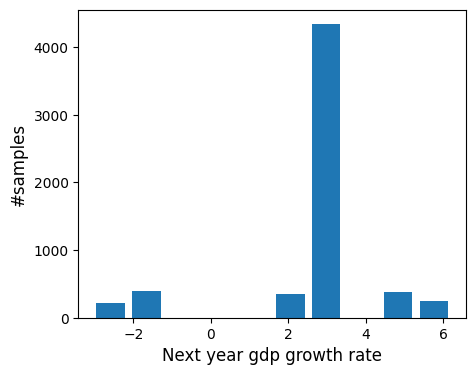

In [1083]:
# Tthe target variable is continuous, check the value distribution of the target variable
import matplotlib.pyplot as plt
plt.hist(df['next_year_gdp'], rwidth=0.8);
plt.xlabel('Next year gdp growth rate', fontsize=12)
plt.ylabel("#samples", fontsize=12)

In [1084]:
X.shape, y.shape

((5920, 30), (5920,))

In [1085]:
# 3. split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape

((4144, 30), (1776, 30))

In [1086]:
dt_regressor = DecisionTreeRegressor(random_state=42, max_depth=3)
dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=42)

In [1087]:
# Predictions
y_pred_train = dt_regressor.predict(X_train)
y_pred_test = dt_regressor.predict(X_test)

# Evaluate the model
print("Training MSE:", mean_squared_error(y_train, y_pred_train))
print("Test MSE:", mean_squared_error(y_test, y_pred_test))
print("Test MAE:", mean_absolute_error(y_test, y_pred_test))
print("Test R^2:", r2_score(y_test, y_pred_test))

Training MSE: 2.957173332236937
Test MSE: 2.986743006209074
Test MAE: 1.0425271204392976
Test R^2: 0.05017836684409216


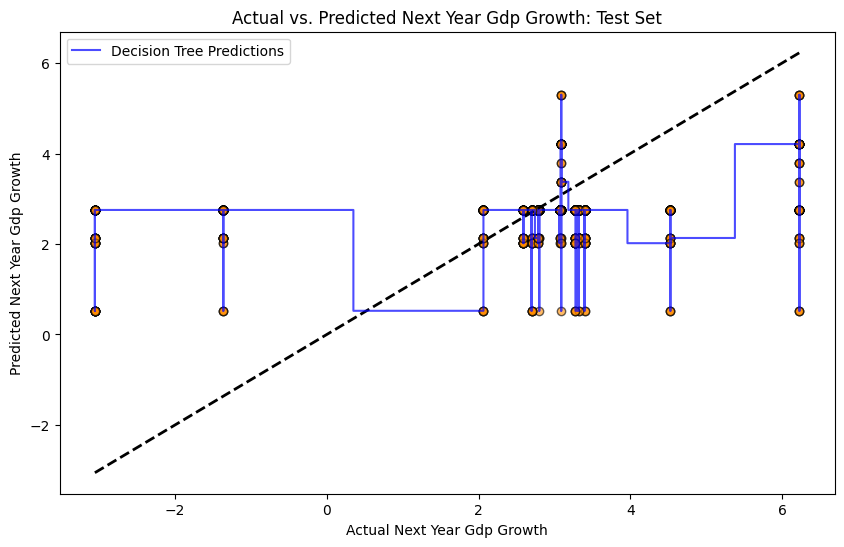

In [1088]:

# Continue from actual vs. predicted scatter plot setup
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, alpha=0.6, color='darkorange', edgecolors='black')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)

# Additional step for clarity: sort the actual diabetes for the line plot
sorted_idx = np.argsort(y_test.ravel())
sorted_actual_next_gdp_growth = y_test.ravel()[sorted_idx]
sorted_predicted_next_gdp_growth = y_pred_test[sorted_idx]

# Add a 'step' plot to visualize the decision tree's piecewise predictions
# Note: This representation is more illustrative than precise, as the decision tree works in feature space
plt.step(sorted_actual_next_gdp_growth, sorted_predicted_next_gdp_growth, where='mid', label='Decision Tree Predictions', color='blue', alpha=0.7)

plt.title('Actual vs. Predicted Next Year Gdp Growth: Test Set')
plt.xlabel('Actual Next Year Gdp Growth')
plt.ylabel('Predicted Next Year Gdp Growth')
plt.legend()
plt.show()

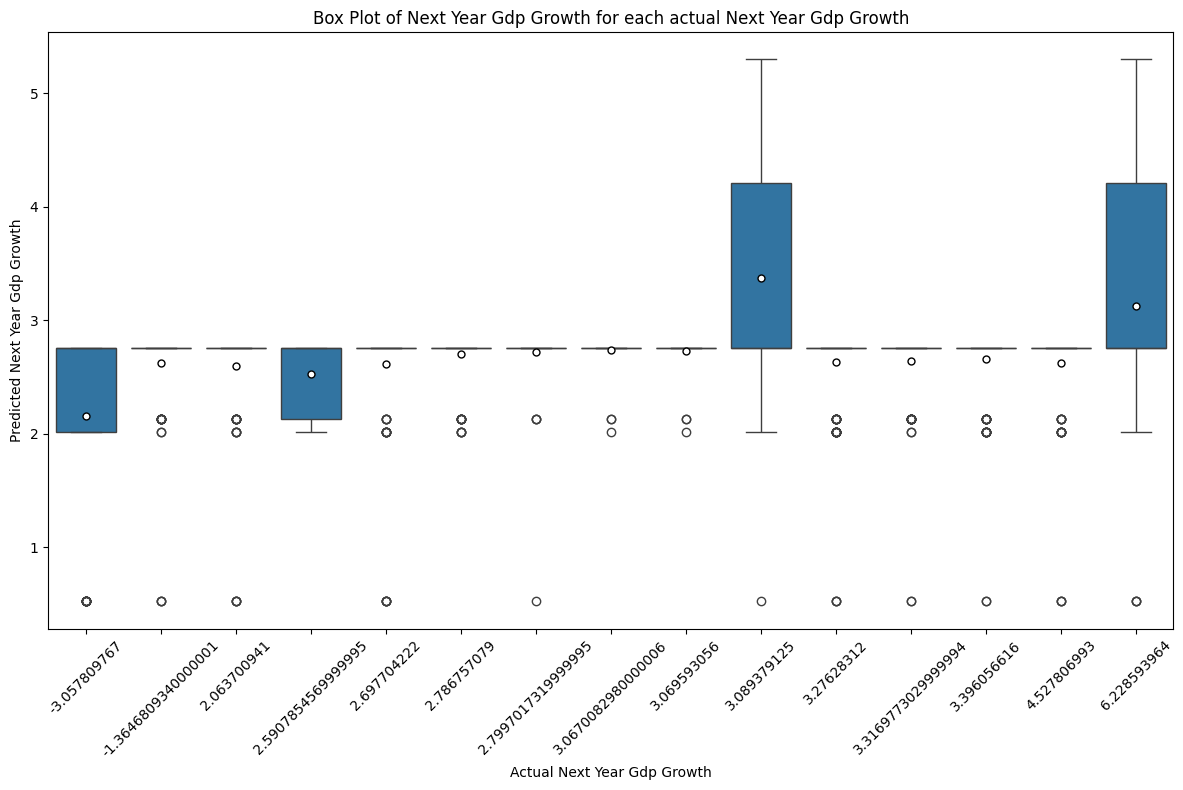

In [1089]:
import seaborn as sns
import pandas as pd

# First, create a DataFrame that combines both actual and predicted ages
data = {'Actual Next Year Gdp Growth': y_test.ravel(), 'Predicted Next Year Gdp Growth': y_pred_test}
df = pd.DataFrame(data)

# For large datasets with many unique actual ages, consider binning the actual ages into ranges for clarity

# Now, use seaborn to create the box plots
plt.figure(figsize=(12, 8))

# Assuming actual ages have a reasonable number of unique values for visualization
# Otherwise, you might want to bin them
sns.boxplot(data=df, x='Actual Next Year Gdp Growth', y='Predicted Next Year Gdp Growth', showmeans=True,
            meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black", "markersize":"5"})

plt.title('Box Plot of Next Year Gdp Growth for each actual Next Year Gdp Growth')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability if there are many unique ages
plt.tight_layout()
plt.show()


### Observation
- There is noticeable variability in predictions within each group of actual GDP growth, as indicated by the spread of the data points and the height of the boxes. This variability suggests inconsistency in the model’s predictions.
- The presence of outliers (shown as dots outside the whiskers of the box plots) across many categories suggests that there are some predictions which are far off from others within the same actual growth category.

In [1090]:
importances = dt_regressor.feature_importances_

# Create a DataFrame to store feature importances
feature_importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort the DataFrame by importance in descending order
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Print the ranked feature importances
print("Ranked feature importances:")
for index, row in feature_importances_df.iterrows():
    print(f"{row['Feature']}: {row['Importance']}")

Ranked feature importances:
pandem: 0.3815224109429079
reform: 0.3070988678610807
sustain: 0.16311030554355593
inflat: 0.0993352717268671
need: 0.020992824709971176
fiscal: 0.0155246310220159
strong: 0.012415688193601218
disput: 0.0
export: 0.0
activ: 0.0
invest: 0.0
challeng: 0.0
macroeconom: 0.0
recoveri: 0.0
stabil: 0.0
strengthen: 0.0
high: 0.0
crisi: 0.0
help: 0.0
remain: 0.0
price: 0.0
issu: 0.0
increas: 0.0
improv: 0.0
debt: 0.0
import: 0.0
continu: 0.0
support: 0.0
risk: 0.0
access: 0.0


In [1091]:
# depth of the fitted tree
dt_regressor.get_depth()

3

In [1092]:
# number of leaves in the fitted tree
dt_regressor.get_n_leaves()

8

In [1093]:
# predict the regression value for the given samples
dt_regressor.predict(X_test[:10])

array([0.52244817, 2.75199108, 2.75199108, 0.52244817, 4.20908575,
       2.75199108, 2.75199108, 5.29845623, 2.75199108, 2.75199108])

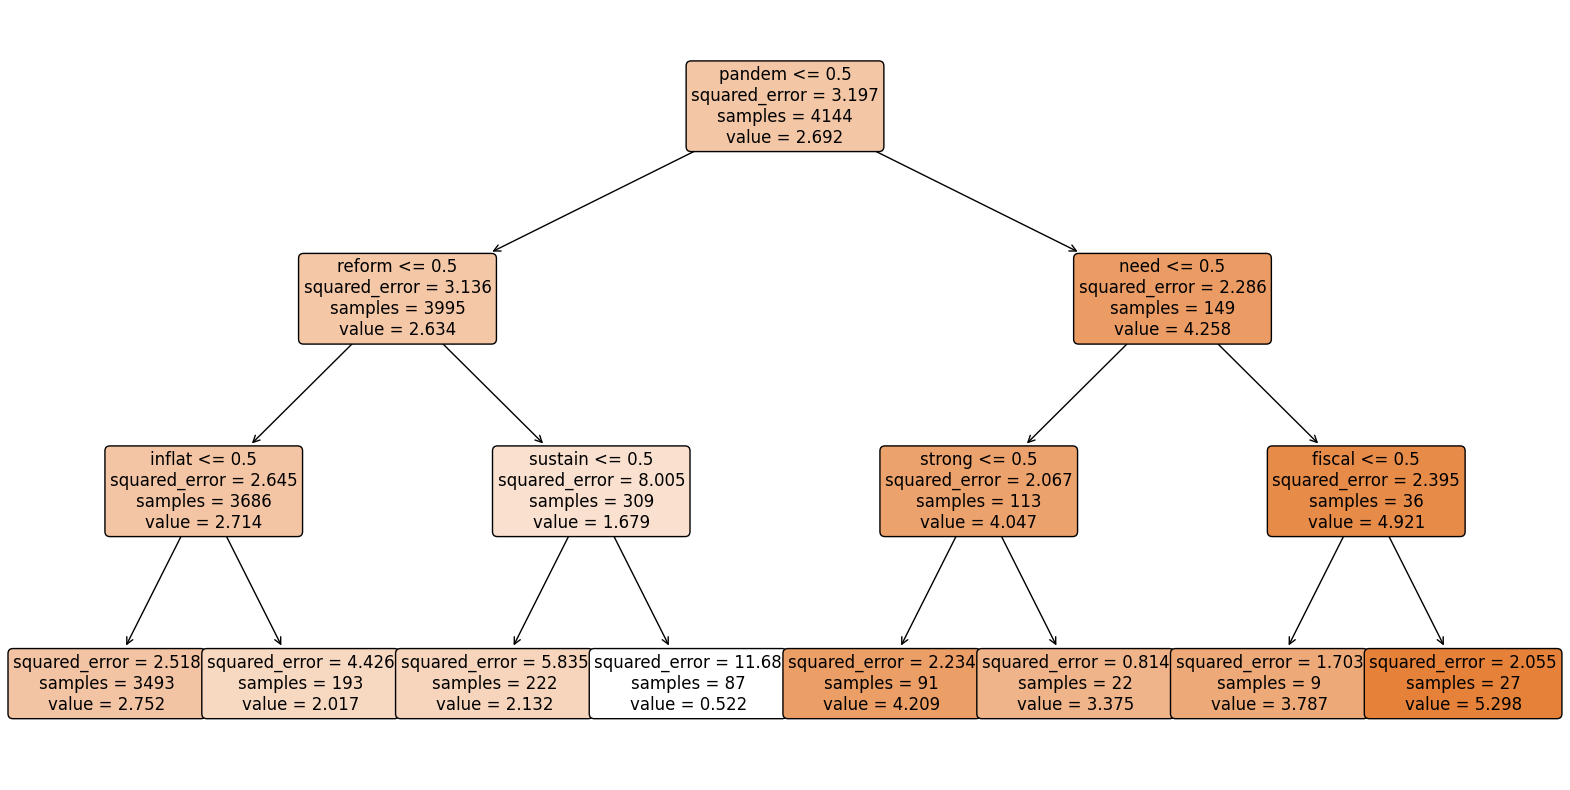

In [1094]:
# 8. Finally, play with different parameter settings and explore how model performance changes. 
# Visualize and compare different decision trees.
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(dt_regressor, 
          feature_names=X.columns, 
          filled=True, 
          rounded=True, 
          fontsize=12)
plt.show()

#### Discussion
- I've been tuning the max_depth parameter of the DecisionTreeRegressor, which is a critical parameter for controlling the complexity of the model. I found that a max_depth of 3 performs the best.
- Overall, the model seems to perform not so well, as indicated by the high test MSE, low R-squared, and relatively high test MAE. Possible reasons for this could include model complexity, inadequate feature selection, or insufficient data for training. Mean Squared Error (MSE): Both training and test MSEs are quite close (2.957 for training and 2.987 for test), suggesting that the model isn't overfitting significantly. 
Mean Absolute Error (MAE): The test MAE of 1.042. : The R^2 score of 0.0502 on the test set is quite low, indicating that only about 5% of the variance in the actual GDP growth is being explained btheur mode
- Pandem (0.3815) and Reform (0.3071) are the 2 most influential in predicting GDP growth in the model. This suggests that variables related to pandemics and economic reforms play significant roles in economic performance. Sustain(0.16311) might also reflect environmental or long-term economic planning impacts on GDP growth.
- By examining the actual vs. predicted scatter and box plots, one can see that the model does not predict well when there is large negative or positive GDP growth. This indicates that the model struggles to accurately predict during times of economic shocks, whether positive or negative. However, when GDP growth is around 2-3%, the model performs relatively well.k.

#### Compare decision tree classifier and regressor
- Feature importances differ between models. In regression, the emphasis is on directly predicting the impact of natural shocks, such as 'pandem,' while classification focuses on distinguishing among outcomes based on policy and economic conditions, such as 'reform'.
- In this case, classification performs much better than regression for the textual features. The outcome variable for classification is binary, indicating whether there is GDP growth in the next year or not, while for regression, it is numerical, representing the actual next year's GDP growth. This makes sense because it is generally easier to capture overall trends (whether there is growth or not) than to accurately predict specific numerical values (the exact rate of growth).

### Random Forest classifer/regressor 

In [1095]:
from sklearn.ensemble import RandomForestClassifier

In [1096]:
# train a random forest classier
# set n_estimators = 1000, criterion = 'entropy', random_state = 42, and keep all the other parameters with the default value.
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 2. load the dataset
df = pd.read_csv('C:/Users/Victoria/OneDrive/文档/Dropbox/Machine Learning Python/Project/data_EDA.csv') 
#generate next year GDP
df_aggregated = df.groupby('Year')['gdp'].mean().reset_index()
df_aggregated['next_year_gdp'] = df_aggregated['gdp'].shift(-1)

# Merge the lagged GDP data back to the original DataFrame
df = df.merge(df_aggregated[['Year', 'next_year_gdp']], on='Year', how='left')
df['next_year_gdp_grow_dummy'] = np.where(df['next_year_gdp'] > 0, 1, 0)


df.dropna(inplace=True)

X = df.drop(columns=['Year', 'gdp', 'Title', 'Description', 'gdp_normal',  'lag_gdp','gdp_grow_dummy',
                     'Tokenized_Description', 'Stem_Lemm_Description', 'Processed_Words', 'Joined_Words','next_year_gdp','next_year_gdp_grow_dummy'])  # Features
y = df['next_year_gdp_grow_dummy']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=1000, criterion='entropy', random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_rf = rf_classifier.predict(X_test)



In [1097]:
# evaluate the random forest classifier on test set (round to the 3rd decimal, e.g., 0.971, 0.020)

# Calculate and print the accuracy
accuracy_rf = (accuracy_score(y_test, y_pred_rf))
print(f"Random Forest Classifier Accuracy: {accuracy_rf}")


Random Forest Classifier Accuracy: 0.902027027027027


In [1098]:
# try different model parameters (e.g., n_estimators) and check the results
# Prepare a function to train and evaluate the model
def train_evaluate_random_forest(n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features='sqrt'):
    rf = RandomForestClassifier(
        n_estimators=n_estimators, 
        max_depth=max_depth, 
        min_samples_split=min_samples_split, 
        min_samples_leaf=min_samples_leaf, 
        max_features=max_features, 
        criterion='entropy', 
        random_state=42
    )
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Experiment with different parameters
parameters = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [ 'sqrt', 'log2']
}

for parameter, values in parameters.items():
    for value in values:
        accuracy = train_evaluate_random_forest(**{parameter: value})
        print(f"{parameter} = {value}: Accuracy = {accuracy}")

n_estimators = 100: Accuracy = 0.901463963963964
n_estimators = 500: Accuracy = 0.902027027027027
n_estimators = 1000: Accuracy = 0.902027027027027
max_depth = None: Accuracy = 0.901463963963964
max_depth = 10: Accuracy = 0.9037162162162162
max_depth = 20: Accuracy = 0.8986486486486487
min_samples_split = 2: Accuracy = 0.901463963963964
min_samples_split = 5: Accuracy = 0.9037162162162162
min_samples_split = 10: Accuracy = 0.9031531531531531
min_samples_leaf = 1: Accuracy = 0.901463963963964
min_samples_leaf = 2: Accuracy = 0.9037162162162162
min_samples_leaf = 4: Accuracy = 0.9025900900900901
max_features = sqrt: Accuracy = 0.901463963963964
max_features = log2: Accuracy = 0.8997747747747747


In [1099]:
importances = rf_classifier.feature_importances_

# Create a DataFrame to store feature importances
feature_importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort the DataFrame by importance in descending order
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Print the ranked feature importances
print("Ranked feature importances:")
for index, row in feature_importances_df.iterrows():
    print(f"{row['Feature']}: {row['Importance']}")

Ranked feature importances:
reform: 0.04421453597044819
fiscal: 0.0430638407767715
improv: 0.041486141131456614
remain: 0.040987208100451256
continu: 0.04051133375586544
increas: 0.040361455226846706
risk: 0.040073199833395086
import: 0.03912598665045825
price: 0.038220023457907405
support: 0.037869044294060475
invest: 0.035051963118382205
need: 0.0346568303877933
sustain: 0.03460183213390516
strong: 0.03426755557409808
strengthen: 0.03408718393300141
inflat: 0.033346197438692694
activ: 0.03296396658327214
stabil: 0.03256627058156782
macroeconom: 0.03209672481952159
high: 0.03126656476183094
help: 0.031130074941071673
crisi: 0.030992248718115446
challeng: 0.0303861086974235
export: 0.02995829954665559
debt: 0.029917790891219223
recoveri: 0.02696565465864096
issu: 0.02541406708151206
access: 0.02134614335528993
pandem: 0.018472061648739477
disput: 0.014599691931605955


In [1100]:
# Predict on the test data
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.902027027027027
Confusion Matrix:
 [[  10  165]
 [   9 1592]]
Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.06      0.10       175
           1       0.91      0.99      0.95      1601

    accuracy                           0.90      1776
   macro avg       0.72      0.53      0.53      1776
weighted avg       0.87      0.90      0.86      1776



In [1101]:
roc_auc = roc_auc_score(y_test, y_pred)
print(f'ROC AUC Score: {roc_auc}')

ROC AUC Score: 0.525760685285982


In [1102]:
# Keep probabilities for the positive outcome only
probabilities = rf_classifier.predict_proba(X_test)
y_scores = probabilities[:, 1]
roc_auc = roc_auc_score(y_test, y_scores)
print(f'ROC AUC Score: {roc_auc}')

ROC AUC Score: 0.6444579280806639


#### Discussion
- In this experiment, I systematically evaluated the performance of a RandomForestClassifier by varying key hyperparameters individually and observing their impact on model accuracy. The parameters adjusted included n_estimators, max_depth, min_samples_split, min_samples_leaf, and max_features, each tested across a range of values.
- 
The RandomForestClassifier was trained using the entropy criterion for splitting, with a consistent random state of 42 for reproducibility
- n_estimators: Increasing the number of trees in the forest (n_estimators) from 100 to 500 and 1000 showed a slight improvement in accuracy, suggesting that more trees can lead to better performance, likely due to reduced variance without a significant increase in bias.- 
max_depth: A max_depth of 10 yielded the highest accuracy, indicating an optimal balance between model complexity and generalization. Deeper trees (depth 20) or unrestricted depth did not improve accurac.
- 
min_samples_split and min_samples_leaf: Increasing min_samples_split and min_samples_leaf generally led to better accuracy, supporting the idea that more stringent requirements on node splitting enhance the model's ability to generaliz
- .
max_features: Using the square root of the number of features (sqrt) slightly outperformed the logarithm of the number of features (log2), indicating that allowing more features at each split provided a better chance for finding informative spli
- There is a relatively balanced distribution among the various features used in the RandomForestClassifier model(especially for words like "remain,
contine, 
incree, 6
r")086. This balance suggests that no single feature overwhelmingly dominates the prediction process, which can be beneficial for model robustness and generalizabili

For model evaluation using the Confusion Matrix:

- The results from the Random Forest model show similar trends to what was seen with the decision tree classifier, although there are some - - improvements, particularly in the ability to identify a few instances of the minority class (0). 
- For class 0, the precision is somewhat adequate at 0.53, but the recall is extremely low at 0.06, leading to a very poor F1-score of 0.10.- 
For class 1, high precision and recall result in a high F1-score of 0.95, reinforcing that the model is proficient in predicting the majority class but at the expense of the minority class
- For the ROC AUC Score, there is a slight improvement but still close to 0.5. While restricting to only positive class, it improves to 0.64..ty.s.
ts

### Regression 

In this subsection we will train and test the following models:

i) Linear Regression

ii) Polynomial Regression

iii) Lasso Regression (with L1 regularization)

iv) Ridge Regression (with L2 regularization)


In [1103]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [1104]:
# 2. load the dataset
df = pd.read_csv('C:/Users/Victoria/OneDrive/文档/Dropbox/Machine Learning Python/Project/data_EDA.csv') 
#generate next year GDP
df_aggregated = df.groupby('Year')['gdp'].mean().reset_index()
df_aggregated['next_year_gdp'] = df_aggregated['gdp'].shift(-1)

# Merge the lagged GDP data back to the original DataFrame
df = df.merge(df_aggregated[['Year', 'next_year_gdp']], on='Year', how='left')
df['next_year_gdp_grow_dummy'] = np.where(df['next_year_gdp'] > 0, 1, 0)

df.dropna(inplace=True)

df_X = df.drop(columns=['Year', 'Title','Description', 'gdp_normal', 'gdp_grow_dummy',
                     'Tokenized_Description', 'Stem_Lemm_Description', 'Processed_Words', 'Joined_Words','next_year_gdp','next_year_gdp_grow_dummy'])  # Features
df_y = df['next_year_gdp_grow_dummy']  # Target variable

In [1105]:
# Split data into train/test set
df_X_train, df_X_test, df_y_train, df_y_test  = train_test_split(df_X, df_y, test_size = 0.3, random_state = 42)

df_X_train.shape, df_X_test.shape
# created 4144 training samples and 1776 testing samples, each sample is represented with 32 features

((4144, 32), (1776, 32))

### Linear Regression


In [1106]:
# Fit on the training data
reg = LinearRegression().fit(df_X_train, df_y_train)

# Evaluate
reg.score(df_X_test, df_y_test).round(3)

0.098

In [1107]:
df_linear_coef = pd.DataFrame({'features':reg.feature_names_in_, 'coefficients':np.round(reg.coef_[0],3)})

display(df_linear_coef.sort_values(['coefficients'], ascending=False).iloc[:3])
print()

,features,coefficients
0,gdp,0.0
1,lag_gdp,0.0
30,macroeconom,0.0


### Polynomial Regression degree=2

In [1108]:
# We will apply the polynomial transform to our float variables
poly_cols = df_X_train.select_dtypes(['float']).columns
# We start with second degree polynomial features 
poly2 = PolynomialFeatures(degree=2, include_bias=True)
# This parameter includes a bias column (a column of ones) in the output. 
# This column acts as the term for the intercept in a linear model. 
# Including the bias term is essential when using linear regression without other means of specifying an intercept, as it allows the model to fit an intercept term.
# Fit and transform selected features of traning data to polynomial representation
poly2_features_train = pd.DataFrame(poly2.fit_transform(df_X_train[poly_cols]),
                                    columns = poly2.get_feature_names_out(poly_cols))


In [1109]:
# Add the ploynomial features to the other remaining features in our training data
# Exclude ~ original selected columns that are contained in poly2_features_train
poly2_train = pd.concat([df_X_train.loc[:,  ~df_X_train.columns.isin(poly_cols)].reset_index(),
                         poly2_features_train], axis=1)

# Set index back to the original train data (when created, poly2_features_train has its indexed reset)
poly2_train = poly2_train.set_index(['index'])

poly2_train.shape

(4144, 36)

In [1110]:
# Transform on test data

poly2_features_test = pd.DataFrame(poly2.transform(df_X_test[poly_cols]),
                                   columns = poly2.get_feature_names_out(poly_cols))

# Add the ploynomial features to the other remaining features in our testing data
# Exclude ~ original selected columns that are contained in poly2_features_train
poly2_test = pd.concat([df_X_test.loc[:,  ~df_X_test.columns.isin(poly_cols)].reset_index(),
                        poly2_features_test],axis=1)

# Set index back to the original train data (when created, poly2_features_train has its indexed reset)
poly2_test = poly2_test.set_index(['index'])

poly2_test.shape

(1776, 36)

In [1111]:
# fit a regression model with the newly generated polynomial training feature matrix
poly2_reg = LinearRegression().fit(poly2_train, df_y_train)

# evaluate model performance on the polynomial testing feature matrix
poly2_reg.score(poly2_test, df_y_test).round(3)

0.522

In [1112]:
df_poly2_reg_coef = pd.DataFrame({'features':poly2_reg.feature_names_in_, 'coefficients':np.round(poly2_reg.coef_[0],3)})

display(df_poly2_reg_coef.sort_values(['coefficients'], ascending=False).iloc[:3])
print()

,features,coefficients
0,fiscal,-0.027
1,remain,-0.027
20,stabil,-0.027


### Polynomial Regression  degree=3

In [1113]:
poly_cols3 = df_X_train.select_dtypes(['float']).columns
poly3 = PolynomialFeatures(degree=3, include_bias=True)

# Fit and transform selected features of traning data to polynomial representation
poly3_features_train = pd.DataFrame(poly3.fit_transform(df_X_train[poly_cols3]),
                                    columns = poly3.get_feature_names_out(poly_cols3))
poly3_train = pd.concat([df_X_train.loc[:,  ~df_X_train.columns.isin(poly_cols3)].reset_index(),
                         poly3_features_train], axis=1)

# Set index back to the original train data (when created, poly2_features_train has its indexed reset)
poly3_train = poly3_train.set_index(['index'])

poly3_train.shape

(4144, 40)

In [1114]:
poly3_features_test = pd.DataFrame(poly3.transform(df_X_test[poly_cols3]),
                                   columns = poly3.get_feature_names_out(poly_cols3))

# Add the ploynomial features to the other remaining features in our testing data
# Exclude ~ original selected columns that are contained in poly2_features_train
poly3_test = pd.concat([df_X_test.loc[:,  ~df_X_test.columns.isin(poly_cols3)].reset_index(),
                        poly3_features_test],axis=1)

# Set index back to the original train data (when created, poly2_features_train has its indexed reset)
poly3_test = poly3_test.set_index(['index'])

poly3_test.shape

(1776, 40)

In [1115]:
poly3_reg = LinearRegression().fit(poly3_train, df_y_train)

# evaluate model performance on the polynomial testing feature matrix
poly3_reg.score(poly3_test, df_y_test).round(3)

0.746

In [1116]:
df_poly3_reg_coef = pd.DataFrame({'features':poly3_reg.feature_names_in_, 'coefficients':np.round(poly3_reg.coef_[0],3)})

display(df_poly3_reg_coef.sort_values(['coefficients'], ascending=False).iloc[:3])
print()

,features,coefficients
0,fiscal,-0.027
1,remain,-0.027
22,challeng,-0.027


### Discussion
- There is a test score improvement for the polynomial model. Presumably, our more complex model has learned to explain more variation in the next year's GDP growth that is generalizable to test data. But as the degree of the polynomial increases, the complexity of the model grows, potentially leading to a scenario called the "curse of dimensionality." This situation arises because adding more features (higher-degree terms) without a proportional increase in data points can spread the data too thin.
- There is a reduction in the magnitude of coefficients for polynomial regression. As the polynomial degree goes up, the magnitude decreases further. When I tested the polynomial degree of 5, the coefficient goes to 0. So higher test score does not mean we have better models. 

### Lasso Regression and Ridge regression

In [1117]:
#fit and evaluate a Lasso regression model using the feature matrix that just generated from polynomial
lasso_reg = Lasso(alpha=0.0006, tol=10e-2).fit(poly2_train, df_y_train)
lasso_reg.score(poly2_test, df_y_test).round(3)

0.52

In [1118]:
ridge_reg = Ridge(alpha=0.0006).fit(poly2_train, df_y_train)
ridge_reg.score(poly2_test, df_y_test).round(3)

0.522

In [1119]:

models = [
    (poly2_reg, 'poly2_coef'),
    (lasso_reg, 'l1_coef'),
    (ridge_reg, 'l2_coef')
]

# Loop through each model to process and print top-10 features
for model, name in models:
    # Handling different shapes of coefficients
    if name == 'poly3_coef':
        coefficients = np.round(model.coef_[0], 3)
    else:
        coefficients = np.round(model.coef_, 3)

    # Flatten the coefficients if they are not already 1D
    if coefficients.ndim > 1:
        coefficients = coefficients.flatten()

    # Create DataFrame
    df_coef = pd.DataFrame({
        'features': model.feature_names_in_,
        'coefficients': coefficients
    })

    # Sort by 'coefficients' and select top 5
    top_features = df_coef.sort_values('coefficients', ascending=False).head(5)
    top_features_series = top_features.set_index('features')['coefficients']
    top_features_series.name = name

    # Print results
    print(f'Top-5 highly correlated features in {name.replace("_coef", "").title()} regression:')
    print(top_features_series)
    print()


Top-5 highly correlated features in Poly2 regression:
features
pandem         0.068
crisi          0.055
gdp lag_gdp    0.053
recoveri       0.053
gdp^2          0.049
Name: poly2_coef, dtype: float64

Top-5 highly correlated features in L1 regression:
features
gdp^2          0.050
gdp lag_gdp    0.047
crisi          0.046
recoveri       0.042
pandem         0.027
Name: l1_coef, dtype: float64

Top-5 highly correlated features in L2 regression:
features
pandem         0.068
crisi          0.055
gdp lag_gdp    0.053
recoveri       0.053
gdp^2          0.049
Name: l2_coef, dtype: float64



In [1120]:

selected_features =df_X.columns
# Create DataFrames for each regression model's coefficients
df_poly2_coef = pd.DataFrame({
    'features': poly2_reg.feature_names_in_,
    'poly2_coef': poly2_reg.coef_[0]
})

df_lasso_coef = pd.DataFrame({
    'features': lasso_reg.feature_names_in_,
    'l1_coef': lasso_reg.coef_
})

df_ridge_coef = pd.DataFrame({
    'features': ridge_reg.feature_names_in_,
    'l2_coef': ridge_reg.coef_[0]
})

# Filter DataFrames based on selected features
df_poly2_filtered = df_poly2_coef[df_poly2_coef['features'].isin(selected_features)]
df_lasso_filtered = df_lasso_coef[df_lasso_coef['features'].isin(selected_features)]
df_ridge_filtered = df_ridge_coef[df_ridge_coef['features'].isin(selected_features)]

# Merge the DataFrames on features
df_merge = df_poly2_filtered.merge(df_lasso_filtered, on='features')
df_merge = df_merge.merge(df_ridge_filtered, on='features')

# Set the index to features for better readability
df_merge.set_index('features', inplace=True)
df_merge = df_merge.round(3)
# Display the final DataFrame
print(df_merge)


             poly2_coef  l1_coef  l2_coef
features                                 
fiscal           -0.027   -0.028   -0.027
remain           -0.027   -0.015   -0.027
risk             -0.027   -0.027   -0.027
support          -0.027   -0.004   -0.027
continu          -0.027   -0.029   -0.027
reform           -0.027   -0.077   -0.027
import           -0.027   -0.018   -0.027
need             -0.027   -0.026   -0.027
debt             -0.027   -0.009   -0.027
improv           -0.027   -0.033   -0.027
increas          -0.027   -0.047   -0.027
strong           -0.027   -0.015   -0.027
sustain          -0.027   -0.028   -0.027
issu             -0.027   -0.016   -0.027
price            -0.027   -0.000   -0.027
crisi            -0.027    0.046   -0.027
help             -0.027   -0.008   -0.027
inflat           -0.027   -0.018   -0.027
high             -0.027    0.000   -0.027
strengthen       -0.027   -0.028   -0.027
stabil           -0.027   -0.025   -0.027
recoveri         -0.027    0.042  

### regression to classification
(Now the outcome variable is binary (whether next year gdp is > 0 or not)

In [1121]:
# Initialize and train the logistic regression model
lasso_reg = Lasso(alpha=0.0006, tol=10e-2).fit(X_train, y_train)
lasso_reg.score(X_test,y_test).round(3)

0.049

In [1122]:
df_lasso_reg_coef = pd.DataFrame({'features':lasso_reg.feature_names_in_, 'coefficients':np.round(lasso_reg.coef_[0],3)})

display(df_lasso_reg_coef.sort_values(['coefficients'], ascending=False).iloc[:3])
print()

,features,coefficients
0,fiscal,-0.048
1,remain,-0.048
28,macroeconom,-0.048


#### Discussion
- L1 and L2 regularization yield similar score performance because there is no significant overfitting issue, meaning that not much penalty is applied.
- In Lasso, the zeroing out of "high","access","price", coefficients suggests that Lasso has deemed it less crucial in the presence of others.
- By examining the Lasso regression applied to the binary outcome, the score is only 0.049, which is very low, indicating that the model does not perform well.
- The polynomial regression (degree 2) and Ridge regression (L2 regularization) coefficients are identical for each feature, while the coefficients from Lasso regression (L1 regularization) show variations. The highly similary coeeficient may indicate the issue of multicollinearity. Polynomial regression is capturing the data variability in a manner similar to how Ridge handles it due to multicollinearity. Multicollinearity can cause the independent variables to be highly correlated, which Ridge regression handles by distributing weights across correlated features to minimize large variations in weights.
- In conclusion, L1, L2, polynomial, linear, and Lasso regression models for a binary outcome do not perform very well. Similar to the difference between decision tree classifiers and regressors, regression models for numeric outcomes do not perform well because predicting actual GDP growth numbers is much more challenging than determining whether GDP will grow or not

### Logistic Regression classifier

In [1123]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
logit_reg = LogisticRegression(random_state=42, C=1.8,solver='newton-cholesky' ).fit(X_train, y_train)


In [1124]:

logit_reg_coef = pd.DataFrame({'features':X.columns, 'coefficients':np.round(logit_reg.coef_[0],3)})

display(logit_reg_coef.sort_values(['coefficients'], ascending=False).iloc[:5])
display(logit_reg_coef.sort_values(['coefficients'], ascending=True).iloc[:5])
print()

,features,coefficients
24,pandem,2.755
21,recoveri,1.117
15,crisi,0.968
26,export,0.282
22,challeng,0.192


,features,coefficients
13,issu,-0.555
10,increas,-0.552
29,access,-0.536
5,reform,-0.522
0,fiscal,-0.434


In [1125]:

# Fit the classifier to the training data
logit_reg.fit(X_train, y_train)
# Predict on the test data
y_pred = logit_reg.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9042792792792793
Confusion Matrix:
 [[  10  165]
 [   5 1596]]
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.06      0.11       175
           1       0.91      1.00      0.95      1601

    accuracy                           0.90      1776
   macro avg       0.79      0.53      0.53      1776
weighted avg       0.88      0.90      0.87      1776



In [1126]:
roc_auc = roc_auc_score(y_test, y_pred)
print(f'ROC AUC Score: {roc_auc}')

ROC AUC Score: 0.5270099045239582


In [1127]:
probabilities = logit_reg.predict_proba(X_test)
y_scores = probabilities[:, 1]
roc_auc = roc_auc_score(y_test, y_scores)
print(f'ROC AUC Score: {roc_auc}')

ROC AUC Score: 0.6714571250111537


### Discussion:

Coefficient:

- "Pandem" emerges as the most significant predictor with the highest positive coefficient, indicating that pandemic-related variables strongly increase the likelihood of a positive outcome. This result may seem counterintuitive, as pandemics typically have a negative impact on GDP growth. However, this phenomenon could be attributed to the economic rebound from 2020 to 2021, where there was a significant shift from negative to positive growth. Similarly, the term "Crisis" also shows a positive association, likely influenced by similar factors. On the other hand, "Recoveri" with a coefficient of 1.084 makes sense, suggesting that recovery phases are associated with a higher probability of achieving positive outcomes.

- 
The logistic regression model reveals several features that negatively impact predictions. The feature "issu" with a coefficient of -0.550 strongly decreases the likelihood of positive outcomes, indicating that prevalent issues or problems are significant predictors of adverse results. Closely following are "increas" and "access," both negatively correlated with positive predictions, suggesting that increases in unfavorable metrics or greater access to problematic resources lead to negative impacts. Similarly, "reform" at -0.520 implies that reforms, although typically positive, may correlate negatively under certain conditions, possibly due to being reactionary measures to existing problems. Lastly, "fiscal" with -0.428 indicates that fiscal constraints or negative fiscal conditions are also predictors of less favorable outcomes. 

Confusion Matrix:
- 
True Positives (TP) for class 1: High at 1596, indicating strong performance on the majority class.- 
True Negatives (TN) for class 0: Remains low at 10, similar to the Random Forest model, indicating the model struggles to identify the minority class accurately- .
False Positives (FP): High at 165, showing many instances of class 0 are misclassified as - 1.
False Negatives (FN): Slightly improved at 5, indicating a minor enhancement in capturing class 1 but not significantly impacting the over- all performance regarding clas.5.s 0.


Precision, Recall, and F1-Score:

- Class 0 (Minority): Precision has improved to 0.67, suggesting that when the model predicts class 0, it is more likely to be correct than in the Random Forest model. However, the recall of 0.06 is still extremely low, meaning the model identifies very few actual class 0 instances. The resulting - F1-score of 0.11 remains poor.
- Class 1 (Majority): Continues to show high precision and recall, leading to a strong F1-score of 0.95.

-  The AUC for overall classification is 0.527, which suggests that the model does slightly better than random forest and decision tree.  The ROC-AUC score calculated from the probabilities (y_scores) of the positive class that the logistic regression outputs is 0.670, also better than random forest and decision tree.

Parameter choosing:

-  I set the solver to ‘newton-cg’ because n_samples is much greater than n_features, and my outcome variable is binary. I also set a slightly higher C value to allow the logistic regression model to try fitting as closely as possible to the training dataset by minimizing the loss function. This approach can lead to a model that perfectly fits the training data, including noise and outliers, which might result in overfitting. However, given the high level of noise and low magnitude to coefficient in the dataset, overfitting is not a major concern for me.

In [1128]:
import pandas as pd


data = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
}, index=y_test.index)  # Ensure the index aligns with the original DataFrame

# Identify errors
data['Correct'] = data['Actual'] == data['Predicted']
errors = data[data['Correct'] == False]

# Now locate errors in the original DataFrame and select only the specified columns
error_details = df.loc[errors.index, ['Year', 'gdp', 'lag_gdp', 'Title', 'Description', 'next_year_gdp_grow_dummy']]

# Include predicted values as well
error_details['Predicted'] = errors['Predicted']

# Display the first row of the error details with the specified columns, including Predicted values
print("Error Details with Predicted Values:")
print(error_details.head(1))

Error Details with Predicted Values:
            Year       gdp   lag_gdp  \
5170  2008-01-01  2.063701  4.375429   

                                                  Title  \
5170  Germany: 2007 Article IV Consultation: Staff R...   

                                            Description  \
5170  The German economy has made major strides, hel...   

      next_year_gdp_grow_dummy  Predicted  
5170                         0          1  


In [1129]:
# Calculate the total number of predictions per year
total_predictions_per_year = df['Year'].value_counts()

# Calculate the number of errors per year
errors_per_year = error_details['Year'].value_counts()

# Calculate the percentage of false predictions per year
percentage_errors_per_year = (errors_per_year / total_predictions_per_year) * 100

top_5_years_errors = sorted_percentage_errors_per_year.head(5)

print("Top 5 Years with Highest Percentage of False Predictions:")
print(top_5_years_errors)

Top 5 Years with Highest Percentage of False Predictions:
Year
2008-01-01    28.020566
2019-01-01    25.925926
2020-01-01     0.829876
2007-01-01     0.282486
2011-01-01     0.240964
Name: count, dtype: float64


### Error Analysis+ Strenth & Weakness:
When comparing all models, one can observe that the mode performs well in predicting the positive class butl does not perform well in predicting the negative class and values far from zero. This may be due to several reasons:

- **Unexpected Shocks:** As noted, negative or positive shocks such as pandemiin 2020 cs or financial cri in 2008ses that aren't typically anticipated by experts can lead to significant prediction errors. These events are often outliers with respect to historical data, causing models to underperform because they are trained on "normal" conditions and thus fail to generalize to these new, extreme situations.

- **Data Limitations:** Most economic and financial models rely on historical data to predict future outcomes. If these models have not been exposed to similar shock events during training, their ability to predict under such conditions is compromised. This lack of historical precedent in the training data can result in poorly informed predictions during unprecedented times.

### Possible Solutions:
- **Incorporate Scenario Analysis:** Adjust models to incorporate scenario-based planning where possible. This involves training models on a range of hypothetical scenarios, including potential crises, to improve their robustness.

- **Expand Data Sources:** Include non-traditional data sources that might provide early signals of economic shifts or shocks, such as high-frequency data, sentiment analysis from news sources, or more granular geographic economic data.

- **Dynamic Modeling Techniques:** Utilize models that adapt over time to changing conditions, such as models incorporating rolling windows of data or models that adjust based on incoming data trends.
ds...